In [111]:
import pandas as pd 
import matplotlib as mlp
import seaborn as sns


In [112]:
pb=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Practice book.xlsx')

In [113]:
pb

,single child,Twins,Triplets
0,8,4,4
1,7,6,4
2,10,7,7
3,6,4,2
4,9,9,3


In [114]:
pb.describe()

,single child,Twins,Triplets
count,5.000000,5.00000,5.000000
mean,8.000000,6.00000,4.000000
std,1.581139,2.12132,1.870829
min,6.000000,4.00000,2.000000
25%,7.000000,4.00000,3.000000
50%,8.000000,6.00000,4.000000
75%,9.000000,7.00000,4.000000
max,10.000000,9.00000,7.000000


In [115]:
sc = [8,7,10,6,9]
tw = [4,6,7,4,9]
tr = [4,4,7,2,3]

In [116]:
overall_score=sc+tw+tr
print(overall_score)

[8, 7, 10, 6, 9, 4, 6, 7, 4, 9, 4, 4, 7, 2, 3]


In [117]:
childs = ( (['sc']*len(sc)) + (['tw']*len(tw)) + (['tr']*len(tr)) )

In [132]:
data = pd.DataFrame({'childs_grp': childs, 'no_of_childs': overall_score})

In [133]:
data

,childs_grp,no_of_childs
0,sc,8
1,sc,7
2,sc,10
3,sc,6
4,sc,9
5,tw,4
6,tw,6
7,tw,7
8,tw,4
9,tw,9


In [120]:
data.groupby('childs_grp').mean()

,no_ of_childs
childs_grp,
sc,8
tr,4
tw,6


In [121]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [122]:
lm = ols('overall_score   ~ childs',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df  sum_sq  mean_sq         F    PR(>F)
childs     2.0    40.0     20.0  5.714286  0.018056
Residual  12.0    42.0      3.5       NaN       NaN


#p value(0.018) is < 0.05 singnificance. so we reject null hypothesis 


**Post hoc analysis(Tukey's Method)**




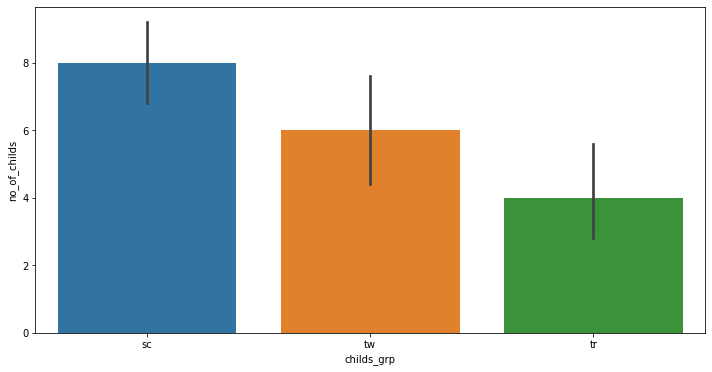

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(x='childs_grp',y='no_of_childs',data=data)

In [135]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data['no_of_childs'],data['childs_grp'])
mc_results = mc.tukeyhsd(alpha=0.05)
print(mc_results.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    sc     tr     -4.0 0.0139 -7.1551 -0.8449   True
    sc     tw     -2.0 0.2484 -5.1551  1.1551  False
    tr     tw      2.0 0.2484 -1.1551  5.1551  False
----------------------------------------------------


In last column reject, if reject is False so the means are equal, and 
#reject is True so the means of the two group is not equal
#so we conclude by saying that single childs are more in numbers.

